## **ProyectoDS_O&G_GarciaEduardo**
*Primer Entrega*

📌 **Abstract**

México cuenta con una rica historia en la producción de petróleo, siendo uno de los principales
productores a nivel mundial. A lo largo de los años, este recurso natural ha desempeñado un papel
crucial en el desarrollo económico del país y su posición en la economía global. Los ingresos
derivados de la explotación petrolera han financiado una variedad de programas sociales,
infraestructura y servicios públicos en el país.
La industria petrolera en México representó en el 2024 alrededor del 1.8% del PIB Nacional con un ingreso neto de 202,584 millones de pesos.

Debido a la importancia del petróleo y el gas para México es importante que los
proyectos de exploración sean metodologías eficientes que cuantifiquen los recursos disponibles y viabilidad para su explitación.
En este proyecto se evaluarán las reservas petroleras del país desde el 2010 hasta el primer mes del 2024.
Los recursos petroleros en México se dividen en 3 categorias:


*   Reservas 1P: Reservas Probadas. Con probabilidad de al menos 90 por ciento de que el volumen a recuperar sea igual o mayor al calculado.
*   Reservas 2P:Reservas Probadas más Reservas Probables. Con probabilidad de al menos 50 por ciento de que el volumen a recuperar sea igual o mayor a la estimación de 2P.
*   Reservas 3P = Reservas Probadas más las Reservas Probables más las Reservas Posibles. Con probabilidad de al menos 10 por ciento de que el volumen a recuperar sea igual o mayor a la estimación de 3P.

Ya que las categorías consideran términos de probabilidad para la asignación de las reservas, es importante crear un ambiente analítico con base en los datos disponibles que permita tomar desiciones basadas en datos provenientes de la SENER.

La base de datos se encuentra disponible en el siguiente link:
https://sih-hidrocarburos.energia.gob.mx/


---
# Objetivos

Crear gráficos con la información contenida en el documetnoq ue permita entender el contexto de las reservas petroleras en los diferentes niveles de organización de los cuerpos petroleros.
 - Calcular la cantidad de campos que existen por ubicación
 - Analizar el histórico de volumenes de reservas para cada categoría entre 2010-2024
 - Calcular los Campos con mayor números de reservas.

# Objetivos para entrega Final
 Desarrollar un modelo de Inteligencia Artificial que me permita realizar  predicción de producción de petróleo y/o gas de los siguientes dos años.
  -Realizar EDA o análisis exploratorio para asegurar la calidad y confiabilidad de los datos.


In [2]:
#Importación de librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#carga de datos
df = pd.read_csv("https://drive.google.com/uc?export=download&id=1i7RSL_tXJ_bz-4xbA8PsHN6b4wN6Jjw6")
df.head(6)

,FECHA,CAMPO_OFICIAL,CAMPO_SIH,UBICACION,CUENCA,CATEGORIA,VOLUMEN_ORIGINAL_PETROLEO_MMB,VOLUMEN_ORIGINAL_GAS_MMMPC,PETROLEO_CRUDO_EQUIVALENTE_MMBPCE,PETROLEO_MMB,GAS_MMMPC,CONDENSADO_MMB,LIQUIDOS_PLANTA_MMB,GAS_SECO_MMMPC
0,1/1/2010,Abkatún,ABKATUN,Aguas someras,Cuencas del Sureste,1P,5434.974429,3879.342787,15.314723,11.559882,19.102185,0.282806,1.227405,11.674163
1,1/1/2010,Abkatún,ABKATUN,Aguas someras,Cuencas del Sureste,2P,5445.607921,3885.136658,30.704171,22.216728,43.178578,0.639254,2.774426,26.388278
2,1/1/2010,Abkatún,ABKATUN,Aguas someras,Cuencas del Sureste,3P,5445.607921,3885.136658,30.704171,22.216728,43.178578,0.639254,2.774426,26.388278
3,1/1/2010,Acachú,ACACHU,Terrestre,Cuencas del Sureste,1P,0.000000,27.603686,1.394857,0.000000,9.012503,0.000000,0.000000,7.254555
4,1/1/2010,Acachú,ACACHU,Terrestre,Cuencas del Sureste,2P,0.000000,27.603686,1.394857,0.000000,9.012503,0.000000,0.000000,7.254555
5,1/1/2010,Acachú,ACACHU,Terrestre,Cuencas del Sureste,3P,0.000000,27.603686,1.394857,0.000000,9.012503,0.000000,0.000000,7.254555


In [3]:
#Analisis de atributos del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31797 entries, 0 to 31796
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FECHA                              31797 non-null  object 
 1   CAMPO_OFICIAL                      31797 non-null  object 
 2   CAMPO_SIH                          31797 non-null  object 
 3   UBICACION                          31797 non-null  object 
 4   CUENCA                             31797 non-null  object 
 5   CATEGORIA                          31797 non-null  object 
 6   VOLUMEN_ORIGINAL_PETROLEO_MMB      31797 non-null  float64
 7   VOLUMEN_ORIGINAL_GAS_MMMPC         31797 non-null  float64
 8   PETROLEO_CRUDO_EQUIVALENTE_MMBPCE  31797 non-null  float64
 9   PETROLEO_MMB                       31797 non-null  float64
 10  GAS_MMMPC                          31797 non-null  float64
 11  CONDENSADO_MMB                     31797 non-null  flo

In [4]:
#Cálculo de los atributos estadísticos del Volumen de Petroleo por Campo de los 3 diferentes tipos de Reservas por Campo
df['VOLUMEN_ORIGINAL_PETROLEO_MMB'] = pd.to_numeric(df['VOLUMEN_ORIGINAL_PETROLEO_MMB'], errors='coerce')
df = df[df['VOLUMEN_ORIGINAL_PETROLEO_MMB'].notnull()]
df = df[df['VOLUMEN_ORIGINAL_PETROLEO_MMB'] > 10]
resumen_estadistico = df.groupby(['CAMPO_SIH', 'CATEGORIA'])['VOLUMEN_ORIGINAL_PETROLEO_MMB'].describe()
resumen_estadistico.head(6)


count         mean         std          min          25%  \
CAMPO_SIH CATEGORIA                                                             
ABKATUN   1P          15.0  5349.479342  102.818598  5228.322179  5228.663096   
          2P          15.0  5357.986129  105.553324  5228.577322  5238.979830   
          3P          15.0  5357.986129  105.553324  5228.577322  5238.979830   
ACTUL     2P           2.0    11.439371    0.000000    11.439371    11.439371   
          3P           2.0    19.380082    0.000000    19.380082    19.380082   
ACUATEMPA 1P          15.0   101.726577    0.001715   101.724893   101.725835   

                             50%          75%          max  
CAMPO_SIH CATEGORIA                                         
ABKATUN   1P         5434.974429  5434.974429  5434.974429  
          2P         5445.607921  5445.607921  5445.607921  
          3P         5445.607921  5445.607921  5445.607921  
ACTUL     2P           11.439371    11.439371    11.439371  
          3P           19.380082    19.380082    19.380082  
ACUATEMPA 1P          101.725835   101.725838   101.729857

In [5]:
#Cálculo de los atributos estadísticos del Volumen de GAS por Campo de los 3 diferentes tipos de Reservas por Campo
df['VOLUMEN_ORIGINAL_GAS_MMMPC'] = pd.to_numeric(df['VOLUMEN_ORIGINAL_GAS_MMMPC'], errors='coerce')
df = df[df['VOLUMEN_ORIGINAL_GAS_MMMPC'].notnull()]
df = df[df['VOLUMEN_ORIGINAL_GAS_MMMPC'] > 10]
resumen_estadistico_gas = df.groupby(['CAMPO_SIH', 'CATEGORIA'])['VOLUMEN_ORIGINAL_GAS_MMMPC'].describe()
resumen_estadistico_gas.head(6)

count         mean         std          min          25%  \
CAMPO_SIH CATEGORIA                                                             
ABKATUN   1P          15.0  3647.270589  289.859145  3304.307212  3304.522671   
          2P          15.0  3651.905677  291.333331  3304.468462  3310.116343   
          3P          15.0  3651.905677  291.333331  3304.468462  3310.116343   
ACUATEMPA 1P          15.0    74.853548    0.001265    74.852235    74.852929   
          2P          15.0    74.853548    0.001265    74.852235    74.852929   
          3P          15.0    79.185447    0.001340    79.184058    79.184792   

                             50%          75%          max  
CAMPO_SIH CATEGORIA                                         
ABKATUN   1P         3879.335097  3879.342787  3879.342787  
          2P         3885.128956  3885.136658  3885.136658  
          3P         3885.128956  3885.136658  3885.136658  
ACUATEMPA 1P           74.853077    74.853077    74.855958  
          2P           74.853077    74.853077    74.855958  
          3P           79.184948    79.184948    79.188000

In [6]:
#Revisión de valores nulos
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]

,0


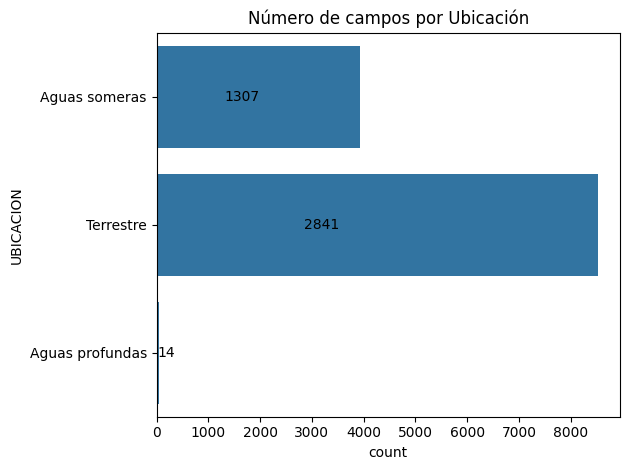

In [7]:
#Diseño de countplot para conocer el número de Campos, ya que hay 3 valores por campo, el conteo se divide entre 3
ax = sns.countplot(y='UBICACION', data=df)
plt.title('Número de campos por Ubicación')
for p in ax.patches:
    count = int(p.get_width()/3)
    y = p.get_y() + p.get_height() / 2
    ax.text(count, y, str(count), va='center')
plt.tight_layout()
plt.show()


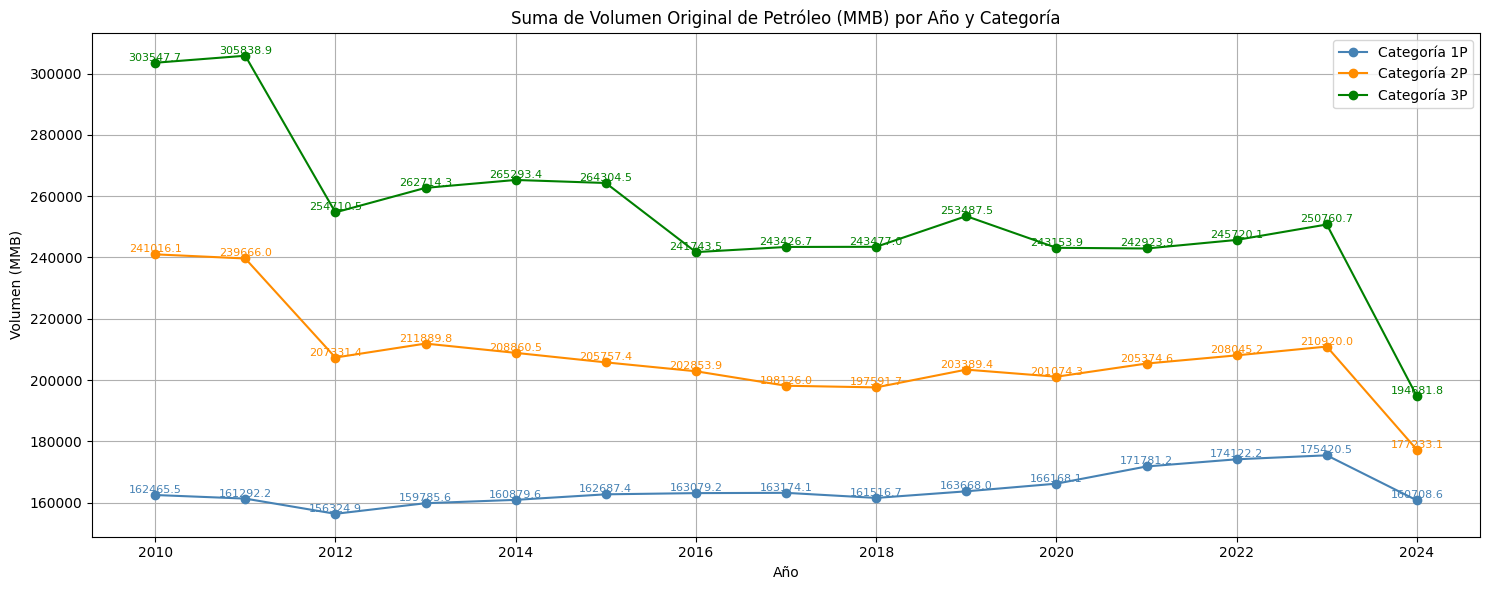

In [8]:
#Suma de VOLUMEN_ORIGINAL_PETROLEO_MMB por cada CATEGORIA a partir del 2010 hasta el 2024
df['FECHA'] = pd.to_datetime(df['FECHA'], errors='coerce')
df['AÑO'] = df['FECHA'].dt.year
categorias = ['1P', '2P', '3P']
plt.figure(figsize=(15, 6))
colores = {
    '1P': 'steelblue',
    '2P': 'darkorange',
    '3P': 'green'}
for categoria in categorias:
    df_cat = df[df['CATEGORIA'] == categoria]
    resumen = df_cat.groupby('AÑO')['VOLUMEN_ORIGINAL_PETROLEO_MMB'].sum().reset_index()
    plt.plot(resumen['AÑO'], resumen['VOLUMEN_ORIGINAL_PETROLEO_MMB'], marker='o', linestyle='-', label=f'Categoría {categoria}', color=colores[categoria])
    for x, y in zip(resumen['AÑO'], resumen['VOLUMEN_ORIGINAL_PETROLEO_MMB']):
        plt.text(x, y, f'{y:.1f}', ha='center', va='bottom', fontsize=8, color=colores[categoria])
plt.title('Suma de Volumen Original de Petróleo (MMB) por Año y Categoría')
plt.xlabel('Año')
plt.ylabel('Volumen (MMB)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

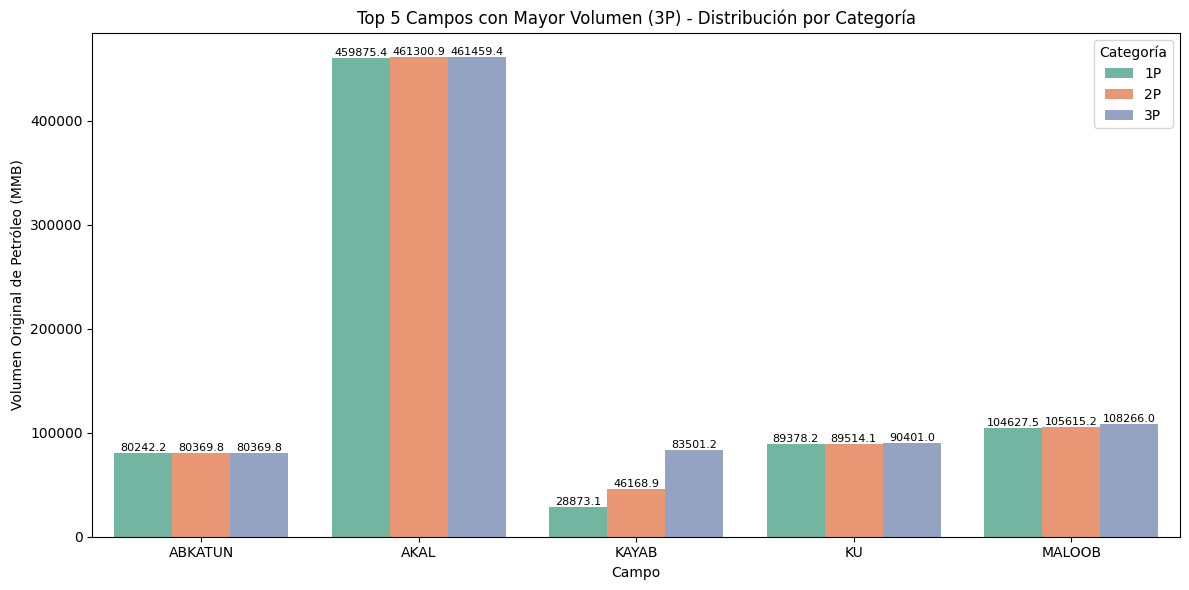

In [10]:
# Calcular el top 5 de campos con mayor volumen original de petróleo en categoría
df_3p = df[df['CATEGORIA'] == '3P']
top_5_campos_3p = df_3p.groupby('CAMPO_SIH')['VOLUMEN_ORIGINAL_PETROLEO_MMB'].sum().nlargest(5).index
df_top_5 = df[df['CAMPO_SIH'].isin(top_5_campos_3p)]
resumen_top_5 = df_top_5.groupby(['CAMPO_SIH', 'CATEGORIA'])['VOLUMEN_ORIGINAL_PETROLEO_MMB'].sum().reset_index()
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=resumen_top_5,
    x='CAMPO_SIH',
    y='VOLUMEN_ORIGINAL_PETROLEO_MMB',
    hue='CATEGORIA',
    palette='Set2'
)
for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height) and height > 0:
        ax.text(
            p.get_x() + p.get_width() / 2,
            height,
            f'{height:.1f}',
            ha='center',
            va='bottom',
            fontsize=8
        )
plt.title('Top 5 Campos con Mayor Volumen (3P) - Distribución por Categoría')
plt.ylabel('Volumen Original de Petróleo (MMB)')
plt.xlabel('Campo')
plt.legend(title='Categoría')
plt.tight_layout()
plt.show()

# Conclusiones

- El número mayor de reservas se encuentra en la categoria 3P para todos los años
- A partir del año 2011 se ha decrementado la incorporación de reservas nuevas, teniendo el punto màs bajo en el 2024.
- El campo con mayor cantidad de reservas en las 3 categorías es el campo AKAL.
- La mayor cantidad de campos petroleros se encuentran en un ambiente terrestre

# Análisis exploratoria EDA para producción de petróleo
-Histograma general: distribución de los volumenes de petroleo por campo para identificar sesgos, outliers o concentraciones inusuales.



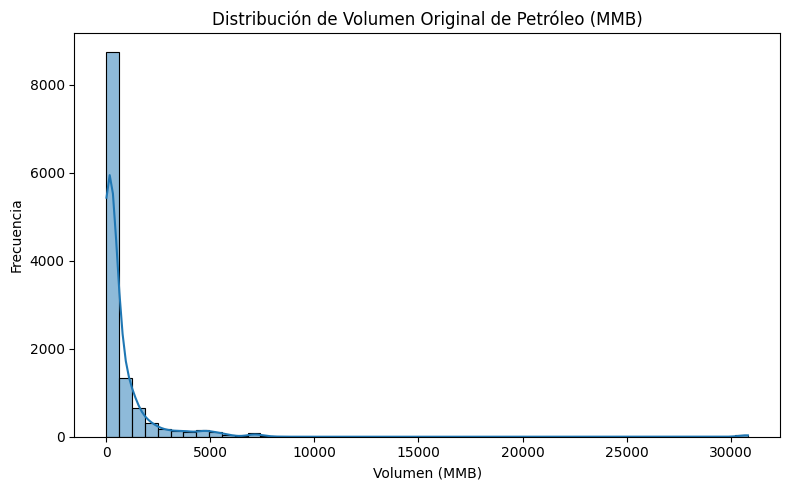

In [11]:
# 1. Histograma general para volumen de petroleo
df_petroleo = df[df['VOLUMEN_ORIGINAL_PETROLEO_MMB'] > 20]
plt.figure(figsize=(8, 5))
sns.histplot(df_petroleo['VOLUMEN_ORIGINAL_PETROLEO_MMB'], bins=50, kde=True)
plt.title("Distribución de Volumen Original de Petróleo (MMB)")
plt.xlabel("Volumen (MMB)")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()



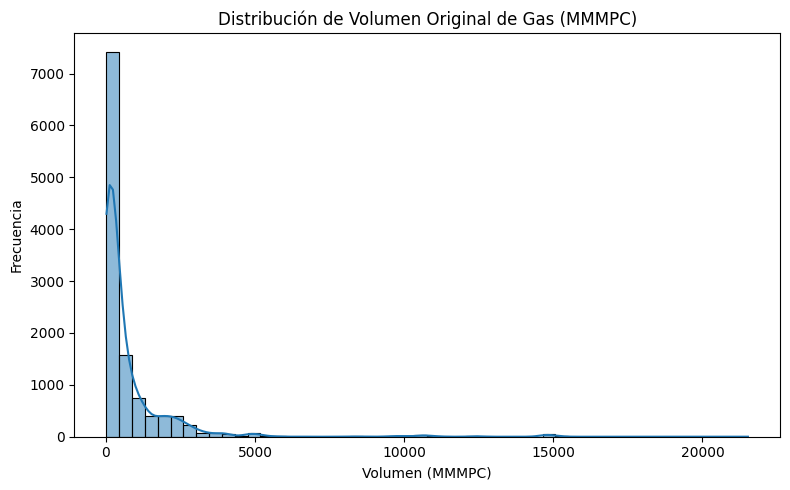

In [12]:
# 1. Histograma general para volumen de gas
df_gas = df[df['VOLUMEN_ORIGINAL_GAS_MMMPC'] > 20]
plt.figure(figsize=(8, 5))
sns.histplot(df_gas['VOLUMEN_ORIGINAL_GAS_MMMPC'], bins=50, kde=True)
plt.title("Distribución de Volumen Original de Gas (MMMPC)")
plt.xlabel("Volumen (MMMPC)")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

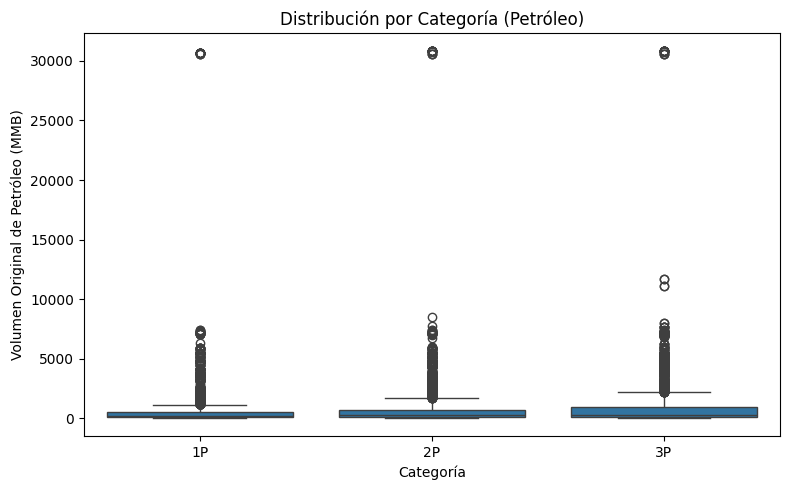

In [13]:
# 2. Boxplot por Categoría (1P, 2P, 3P) Petróleo
plt.figure(figsize=(8, 5))
sns.boxplot(x='CATEGORIA', y=df_petroleo['VOLUMEN_ORIGINAL_PETROLEO_MMB'], data=df_petroleo)
plt.title("Distribución por Categoría (Petróleo)")
plt.ylabel("Volumen Original de Petróleo (MMB)")
plt.xlabel("Categoría")
plt.tight_layout()
plt.show()

In [14]:
#Entendiendo los outliers.
df_filtrado = df[df['VOLUMEN_ORIGINAL_PETROLEO_MMB'].notnull()]
Q1 = df_filtrado['VOLUMEN_ORIGINAL_PETROLEO_MMB'].quantile(0.25)
Q3 = df_filtrado['VOLUMEN_ORIGINAL_PETROLEO_MMB'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df_filtrado[
    (df_filtrado['VOLUMEN_ORIGINAL_PETROLEO_MMB'] < limite_inferior) |
    (df_filtrado['VOLUMEN_ORIGINAL_PETROLEO_MMB'] > limite_superior)
]

print("Número de outliers detectados:", outliers.shape[0])
outliers[['CAMPO_SIH', 'CATEGORIA', 'VOLUMEN_ORIGINAL_PETROLEO_MMB', 'FECHA']].sort_values(by='VOLUMEN_ORIGINAL_PETROLEO_MMB', ascending=False)

Número de outliers detectados: 1416


,CAMPO_SIH,CATEGORIA,VOLUMEN_ORIGINAL_PETROLEO_MMB,FECHA
30212,AKAL,3P,30821.069430,2024-01-01
28130,AKAL,3P,30821.069430,2023-01-01
26123,AKAL,3P,30820.058240,2022-01-01
24155,AKAL,3P,30818.842250,2021-01-01
17990,AKAL,3P,30818.839910,2018-01-01
...,...,...,...,...
31783,ZAMA,2P,1537.480946,2024-01-01
30163,ZAMA,2P,1537.265664,2023-01-01
28660,COYOL,2P,1529.254879,2023-01-01
26632,COYOL,2P,1529.254879,2022-01-01


from matplotlib import pyplot as plt
_df_0['VOLUMEN_ORIGINAL_PETROLEO_MMB'].plot(kind='hist', bins=20, title='VOLUMEN_ORIGINAL_PETROLEO_MMB')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('CATEGORIA').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['FECHA']
  ys = series['VOLUMEN_ORIGINAL_PETROLEO_MMB']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('FECHA', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('CATEGORIA')):
  _plot_series(series, series_name, i)
  fig.legend(title='CATEGORIA', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('FECHA')
_ = plt.ylabel('VOLUMEN_ORIGINAL_PETROLEO_MMB')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['FECHA']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'FECHA'}, axis=1)
              .sort_values('FECHA', ascending=True))
  xs = counted['FECHA']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('FECHA', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('CATEGORIA')):
  _plot_series(series, series_name, i)
  fig.legend(title='CATEGORIA', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('FECHA')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_4['VOLUMEN_ORIGINAL_PETROLEO_MMB'].plot(kind='line', figsize=(8, 4), title='VOLUMEN_ORIGINAL_PETROLEO_MMB')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_5['CATEGORIA'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_5, x='VOLUMEN_ORIGINAL_PETROLEO_MMB', y='CATEGORIA', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

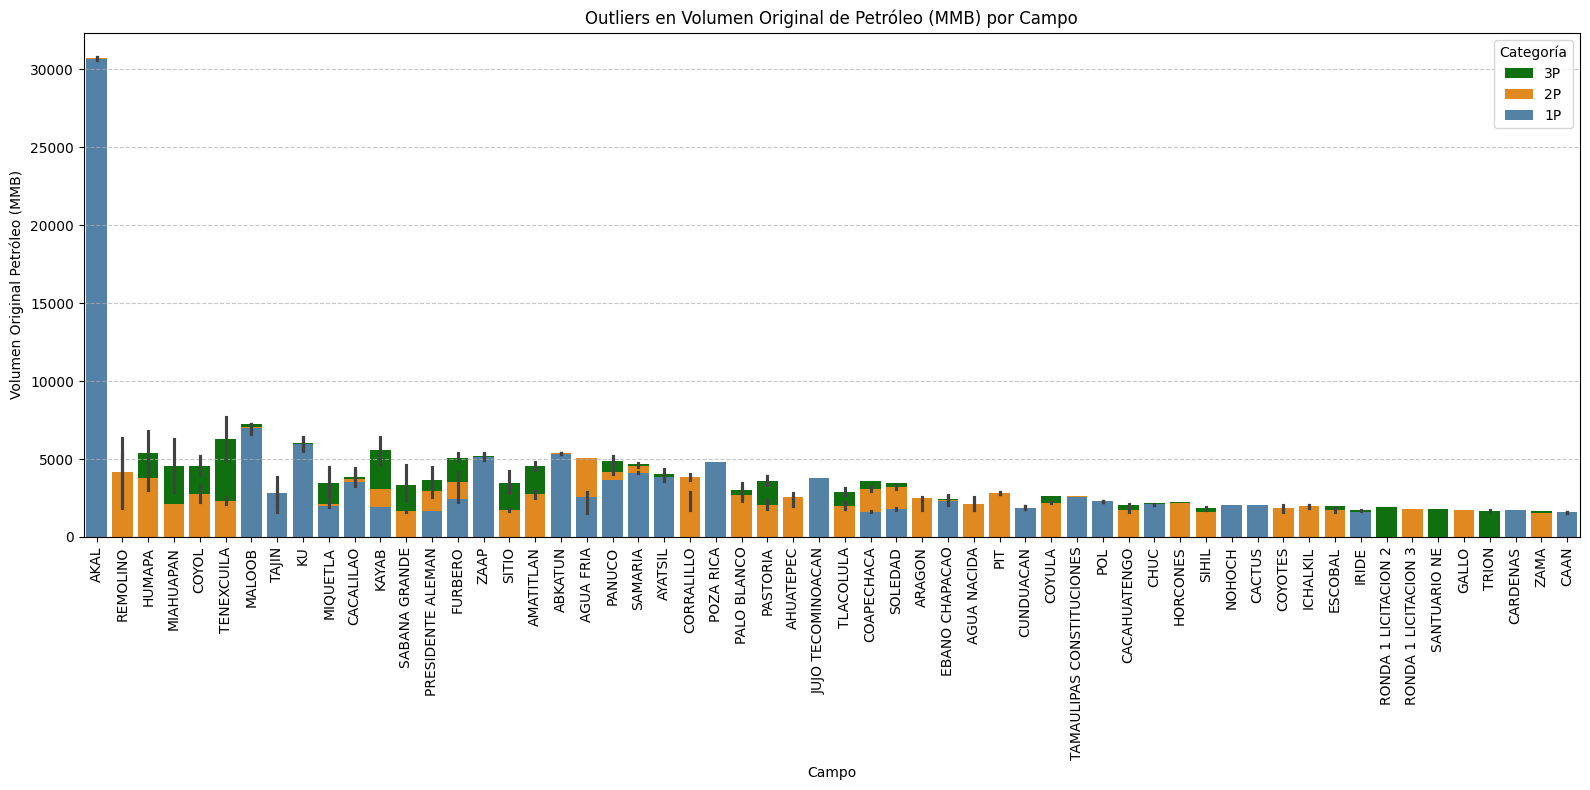

In [26]:
#Entendiendo los outliers de manera Gráfica.
df = df[df['VOLUMEN_ORIGINAL_PETROLEO_MMB'].notnull()]

Q1 = df['VOLUMEN_ORIGINAL_PETROLEO_MMB'].quantile(0.25)
Q3 = df['VOLUMEN_ORIGINAL_PETROLEO_MMB'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df[
    (df['VOLUMEN_ORIGINAL_PETROLEO_MMB'] < limite_inferior) |
    (df['VOLUMEN_ORIGINAL_PETROLEO_MMB'] > limite_superior)
].copy()

outliers = outliers.sort_values(by='VOLUMEN_ORIGINAL_PETROLEO_MMB', ascending=False)

colores_categoria = {
    '1P': 'steelblue',
    '2P': 'darkorange',
    '3P': 'green'
}

plt.figure(figsize=(16, 8))
sns.barplot(
    data=outliers,
    x='CAMPO_SIH',
    y='VOLUMEN_ORIGINAL_PETROLEO_MMB',
    hue='CATEGORIA',
    dodge=False,
    palette=colores_categoria
)

plt.title('Outliers en Volumen Original de Petróleo (MMB) por Campo')
plt.xlabel('Campo')
plt.ylabel('Volumen Original Petróleo (MMB)')
plt.xticks(rotation=90)
plt.legend(title='Categoría')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



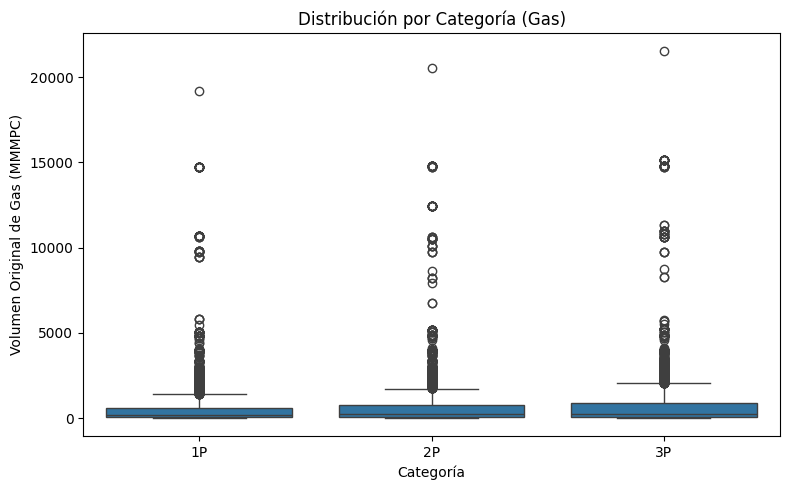

In [16]:
# 2. Boxplot por Categoría (1P, 2P, 3P) GAS
plt.figure(figsize=(8, 5))
sns.boxplot(x='CATEGORIA', y=df_gas['VOLUMEN_ORIGINAL_GAS_MMMPC'], data=df_gas)
plt.title("Distribución por Categoría (Gas)")
plt.ylabel("Volumen Original de Gas (MMMPC)")
plt.xlabel("Categoría")
plt.tight_layout()
plt.show()

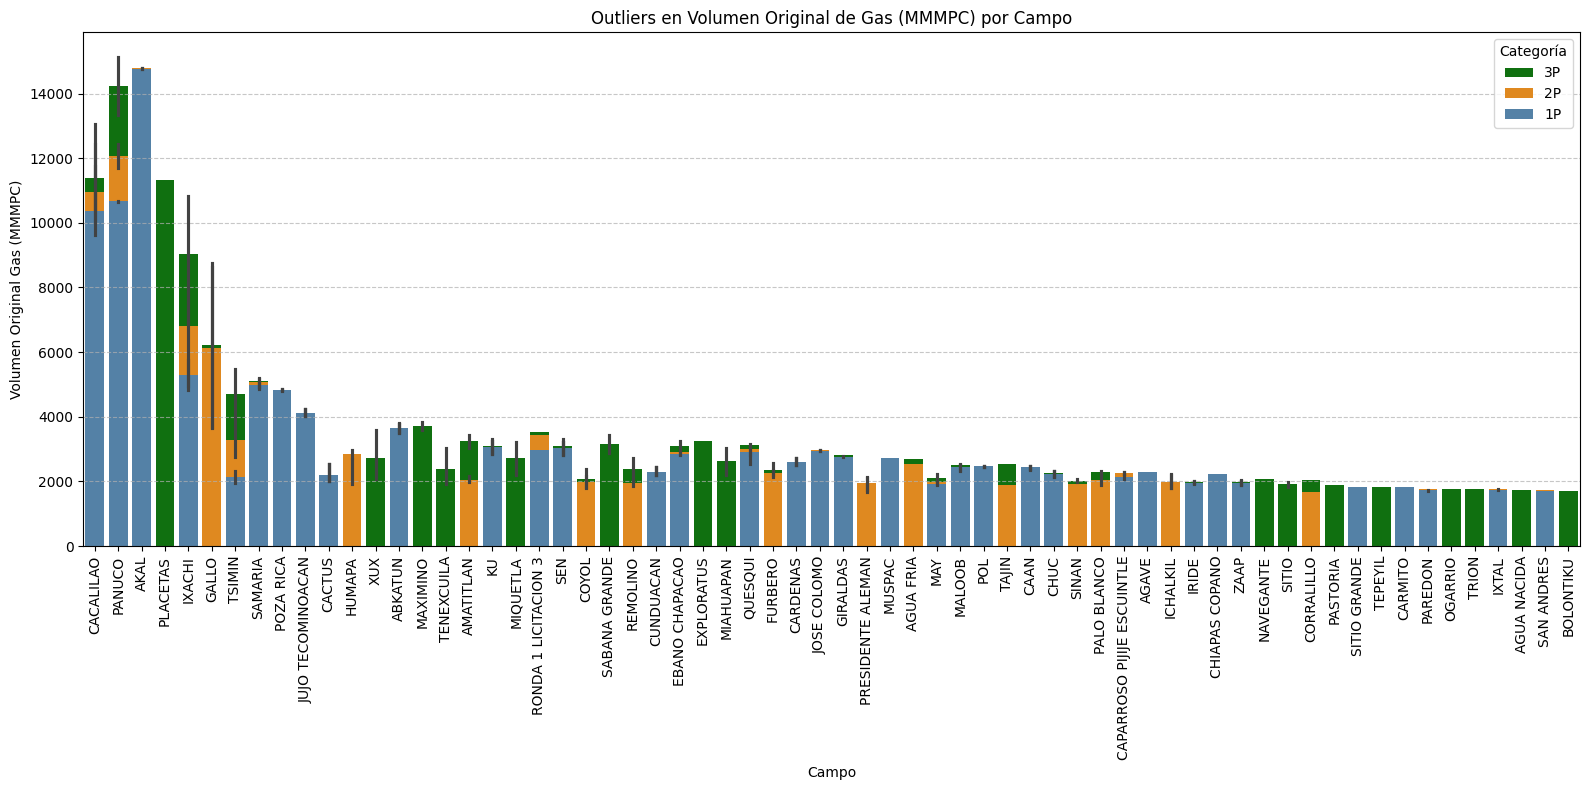

In [27]:
#Entendiendo los outliers de manera Gráfica.
df = df[df['VOLUMEN_ORIGINAL_GAS_MMMPC'].notnull()]

Q1 = df['VOLUMEN_ORIGINAL_GAS_MMMPC'].quantile(0.25)
Q3 = df['VOLUMEN_ORIGINAL_GAS_MMMPC'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df[
    (df['VOLUMEN_ORIGINAL_GAS_MMMPC'] < limite_inferior) |
    (df['VOLUMEN_ORIGINAL_GAS_MMMPC'] > limite_superior)
].copy()

outliers = outliers.sort_values(by='VOLUMEN_ORIGINAL_GAS_MMMPC', ascending=False)

colores_categoria = {
    '1P': 'steelblue',
    '2P': 'darkorange',
    '3P': 'green'
}

plt.figure(figsize=(16, 8))
sns.barplot(
    data=outliers,
    x='CAMPO_SIH',
    y='VOLUMEN_ORIGINAL_GAS_MMMPC',
    hue='CATEGORIA',
    dodge=False,
    palette=colores_categoria
)

plt.title('Outliers en Volumen Original de Gas (MMMPC) por Campo')
plt.xlabel('Campo')
plt.ylabel('Volumen Original Gas (MMMPC)')
plt.xticks(rotation=90)
plt.legend(title='Categoría')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


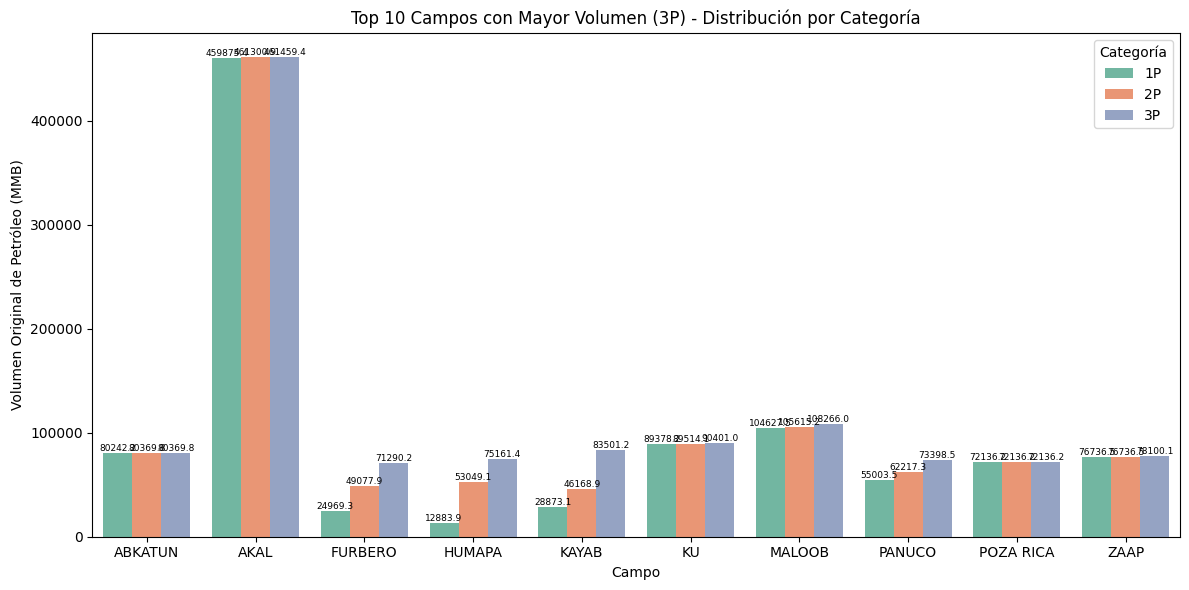

In [17]:
# 3. Barplot de Volumen por los 10 Campos más representativos de Petroleo
df_3p = df[df['CATEGORIA'] == '3P']
top_10_campos_3p = df_3p.groupby('CAMPO_SIH')['VOLUMEN_ORIGINAL_PETROLEO_MMB'].sum().nlargest(10).index
df_top_10 = df[df['CAMPO_SIH'].isin(top_10_campos_3p)]
resumen_top_10 = df_top_10.groupby(['CAMPO_SIH', 'CATEGORIA'])['VOLUMEN_ORIGINAL_PETROLEO_MMB'].sum().reset_index()
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=resumen_top_10,
    x='CAMPO_SIH',
    y='VOLUMEN_ORIGINAL_PETROLEO_MMB',
    hue='CATEGORIA',
    palette='Set2'
)
for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height) and height > 0:
        ax.text(
            p.get_x() + p.get_width() / 2,
            height,
            f'{height:.1f}',
            ha='center',
            va='bottom',
            fontsize=6.5
        )
plt.title('Top 10 Campos con Mayor Volumen (3P) - Distribución por Categoría')
plt.ylabel('Volumen Original de Petróleo (MMB)')
plt.xlabel('Campo')
plt.legend(title='Categoría')
plt.tight_layout()
plt.show()

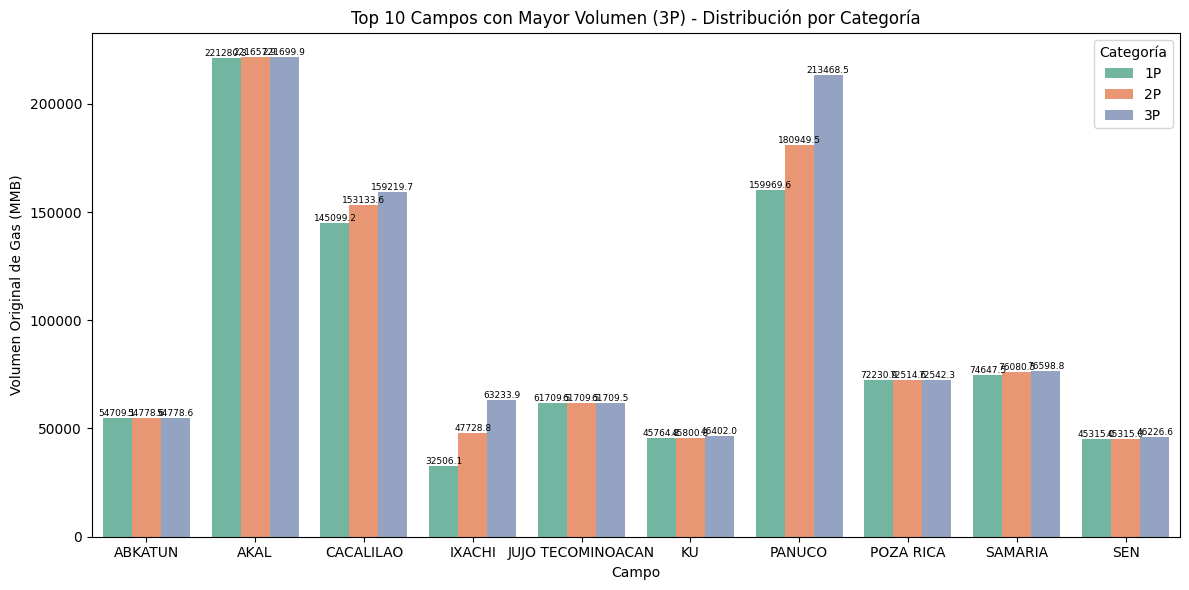

In [18]:
# 3. Barplot de Volumen por los 10 Campos más representativos de Petroleo
df_3p_gas = df[df['CATEGORIA'] == '3P']
top_10_campos_3p_gas = df_3p_gas.groupby('CAMPO_SIH')['VOLUMEN_ORIGINAL_GAS_MMMPC'].sum().nlargest(10).index
df_top_10_gas = df[df['CAMPO_SIH'].isin(top_10_campos_3p_gas)]
resumen_top_10_gas = df_top_10_gas.groupby(['CAMPO_SIH', 'CATEGORIA'])['VOLUMEN_ORIGINAL_GAS_MMMPC'].sum().reset_index()
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=resumen_top_10_gas,
    x='CAMPO_SIH',
    y='VOLUMEN_ORIGINAL_GAS_MMMPC',
    hue='CATEGORIA',
    palette='Set2'
)
for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height) and height > 0:
        ax.text(
            p.get_x() + p.get_width() / 2,
            height,
            f'{height:.1f}',
            ha='center',
            va='bottom',
            fontsize=6.5
        )
plt.title('Top 10 Campos con Mayor Volumen (3P) - Distribución por Categoría')
plt.ylabel('Volumen Original de Gas (MMB)')
plt.xlabel('Campo')
plt.legend(title='Categoría')
plt.tight_layout()
plt.show()

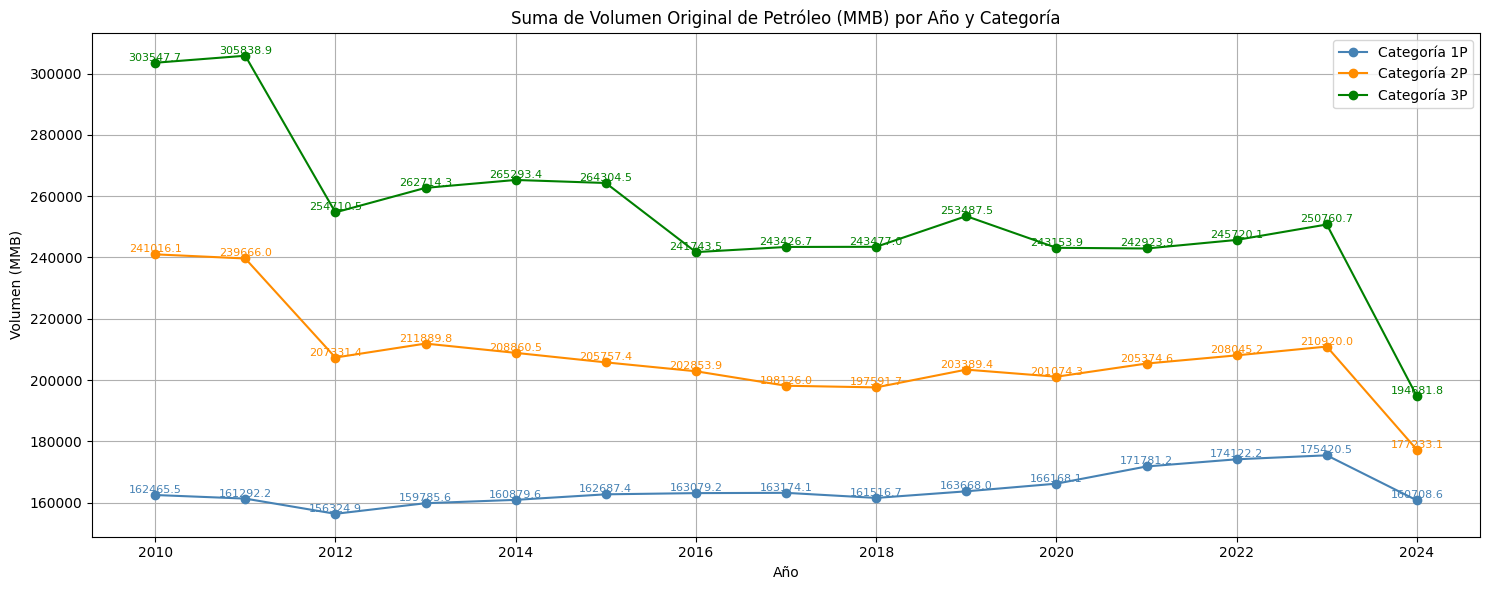

In [19]:
# 5. Lineplot temporal de producción para Petroleo
df['FECHA'] = pd.to_datetime(df['FECHA'], errors='coerce')
df['AÑO'] = df['FECHA'].dt.year
categorias = ['1P', '2P', '3P']
plt.figure(figsize=(15, 6))
colores = {
    '1P': 'steelblue',
    '2P': 'darkorange',
    '3P': 'green'}
for categoria in categorias:
    df_cat = df[df['CATEGORIA'] == categoria]
    resumen = df_cat.groupby('AÑO')['VOLUMEN_ORIGINAL_PETROLEO_MMB'].sum().reset_index()
    plt.plot(resumen['AÑO'], resumen['VOLUMEN_ORIGINAL_PETROLEO_MMB'], marker='o', linestyle='-', label=f'Categoría {categoria}', color=colores[categoria])
    for x, y in zip(resumen['AÑO'], resumen['VOLUMEN_ORIGINAL_PETROLEO_MMB']):
        plt.text(x, y, f'{y:.1f}', ha='center', va='bottom', fontsize=8, color=colores[categoria])
plt.title('Suma de Volumen Original de Petróleo (MMB) por Año y Categoría')
plt.xlabel('Año')
plt.ylabel('Volumen (MMB)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

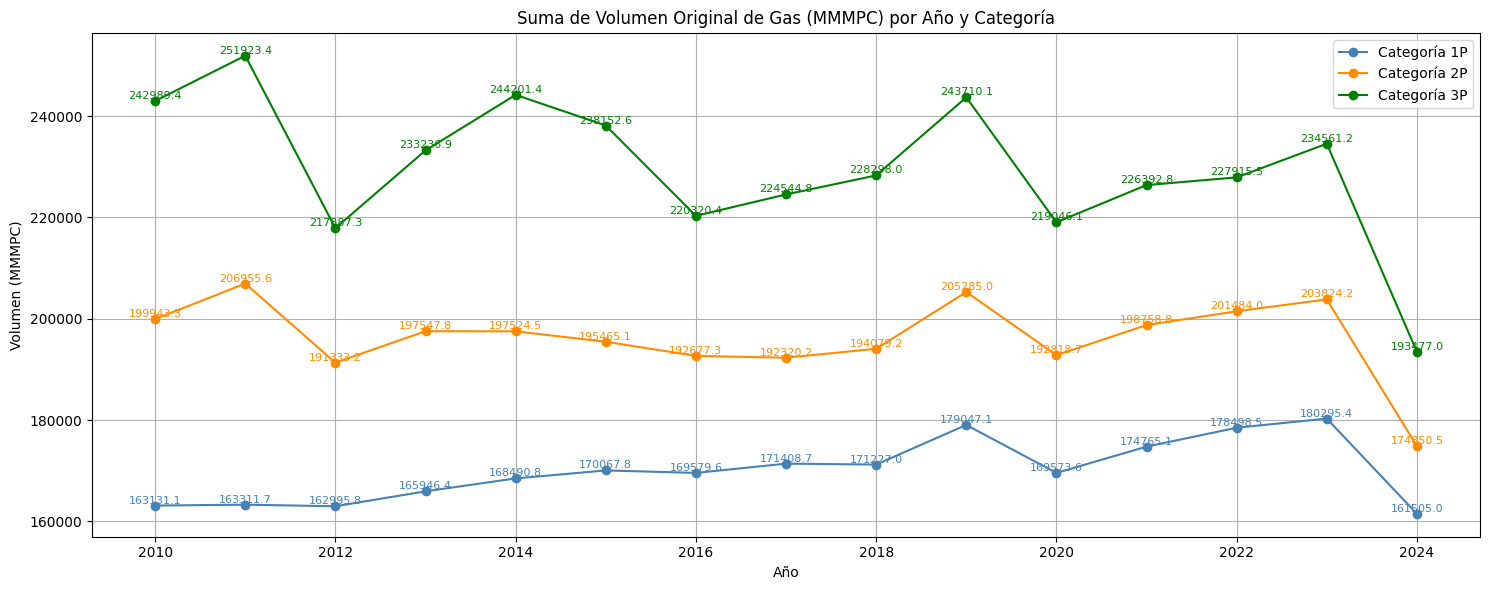

In [20]:
# 5. Lineplot temporal de producción para Gas
df['FECHA'] = pd.to_datetime(df['FECHA'], errors='coerce')
df['AÑO'] = df['FECHA'].dt.year
categorias = ['1P', '2P', '3P']
plt.figure(figsize=(15, 6))
colores = {
    '1P': 'steelblue',
    '2P': 'darkorange',
    '3P': 'green'}
for categoria in categorias:
    df_cat = df[df['CATEGORIA'] == categoria]
    resumen = df_cat.groupby('AÑO')['VOLUMEN_ORIGINAL_GAS_MMMPC'].sum().reset_index()
    plt.plot(resumen['AÑO'], resumen['VOLUMEN_ORIGINAL_GAS_MMMPC'], marker='o', linestyle='-', label=f'Categoría {categoria}', color=colores[categoria])
    for x, y in zip(resumen['AÑO'], resumen['VOLUMEN_ORIGINAL_GAS_MMMPC']):
        plt.text(x, y, f'{y:.1f}', ha='center', va='bottom', fontsize=8, color=colores[categoria])
plt.title('Suma de Volumen Original de Gas (MMMPC) por Año y Categoría')
plt.xlabel('Año')
plt.ylabel('Volumen (MMMPC)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

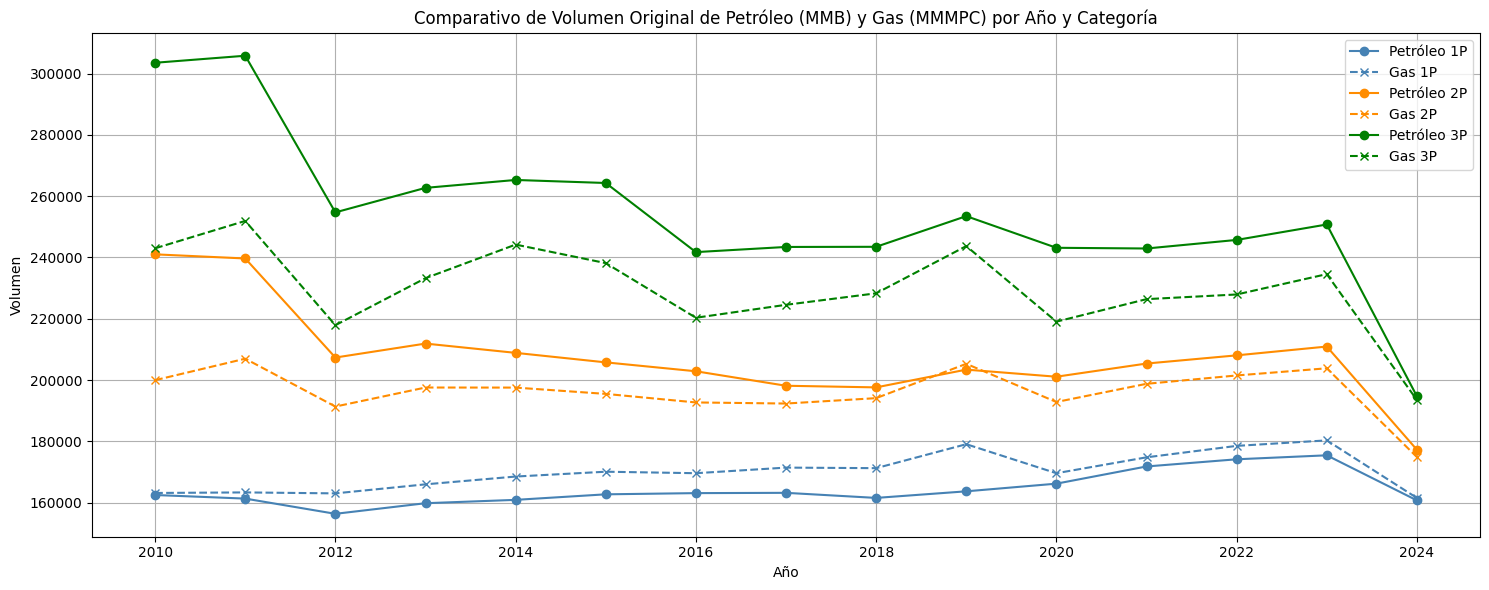

In [25]:
# 5. Lineplot temporal de producción para Petroleo y Gas traslapada
df['FECHA'] = pd.to_datetime(df['FECHA'], errors='coerce')
df['AÑO'] = df['FECHA'].dt.year

categorias = ['1P', '2P', '3P']

colores = {
    '1P': 'steelblue',
    '2P': 'darkorange',
    '3P': 'green'
}

plt.figure(figsize=(15, 6))

for categoria in categorias:

    df_pet = df[df['CATEGORIA'] == categoria]
    resumen_pet = df_pet.groupby('AÑO')['VOLUMEN_ORIGINAL_PETROLEO_MMB'].sum().reset_index()
    plt.plot(resumen_pet['AÑO'], resumen_pet['VOLUMEN_ORIGINAL_PETROLEO_MMB'],
             marker='o', linestyle='-', label=f'Petróleo {categoria}', color=colores[categoria])

    resumen_gas = df_pet.groupby('AÑO')['VOLUMEN_ORIGINAL_GAS_MMMPC'].sum().reset_index()
    plt.plot(resumen_gas['AÑO'], resumen_gas['VOLUMEN_ORIGINAL_GAS_MMMPC'],
             marker='x', linestyle='--', label=f'Gas {categoria}', color=colores[categoria])

plt.title('Comparativo de Volumen Original de Petróleo (MMB) y Gas (MMMPC) por Año y Categoría')
plt.xlabel('Año')
plt.ylabel('Volumen')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# **Modelo de Machine Learning para generar la predicción mensual a dos años de cada campo y sus reservas para los proximos dos años.**

In [36]:
url = "https://drive.google.com/uc?export=download&id=1i7RSL_tXJ_bz-4xbA8PsHN6b4wN6Jjw6"
df = pd.read_csv(url)

df['FECHA'] = pd.to_datetime(df['FECHA'], errors='coerce')
df['AÑO'] = df['FECHA'].dt.year

columnas_interes = [
    'AÑO',
    'CAMPO_SIH',
    'CATEGORIA',
    'VOLUMEN_ORIGINAL_PETROLEO_MMB',
    'VOLUMEN_ORIGINAL_GAS_MMMPC'
]

tabla_agrupada = df[columnas_interes].groupby(['AÑO', 'CAMPO_SIH', 'CATEGORIA'], as_index=False).sum()

tabla_agrupada.to_csv("Campos_ML_Model.csv", index=False)
tabla_agrupada


,AÑO,CAMPO_SIH,CATEGORIA,VOLUMEN_ORIGINAL_PETROLEO_MMB,VOLUMEN_ORIGINAL_GAS_MMMPC
0,2010,ABKATUN,1P,5434.974429,3879.342787
1,2010,ABKATUN,2P,5445.607921,3885.136658
2,2010,ABKATUN,3P,5445.607921,3885.136658
3,2010,ACACHU,1P,0.000000,27.603686
4,2010,ACACHU,2P,0.000000,27.603686
...,...,...,...,...,...
31792,2024,ZAZIL HA,2P,0.000000,0.000000
31793,2024,ZAZIL HA,3P,261.250270,42.244135
31794,2024,ZORRO,1P,0.000000,0.000000
31795,2024,ZORRO,2P,0.000000,0.000000


In [75]:
df = pd.read_csv('/content/Campos_ML_Model.csv')

df['AÑO'] = pd.to_numeric(df['AÑO'], errors='coerce')

df_grouped = df.groupby(['CAMPO_SIH', 'CATEGORIA', 'AÑO'], as_index=False).agg({
    'VOLUMEN_ORIGINAL_PETROLEO_MMB': 'sum',
    'VOLUMEN_ORIGINAL_GAS_MMMPC': 'sum'
})

df_grouped = df_grouped.sort_values(by=['CAMPO_SIH', 'CATEGORIA', 'AÑO'])

display(df_grouped.head())

# Guardar como CSV para futuras referencias o descarga
df_grouped.to_csv('/content/Campos_ML_Model_Group.csv', index=False)

from google.colab import files
files.download('Campos_ML_Model_Group.csv')


,CAMPO_SIH,CATEGORIA,AÑO,VOLUMEN_ORIGINAL_PETROLEO_MMB,VOLUMEN_ORIGINAL_GAS_MMMPC
0,ABKATUN,1P,2010,5434.974429,3879.342787
1,ABKATUN,1P,2011,5434.974429,3879.342787
2,ABKATUN,1P,2012,5434.974429,3879.342787
3,ABKATUN,1P,2013,5434.974429,3879.342787
4,ABKATUN,1P,2014,5434.974429,3879.342787


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

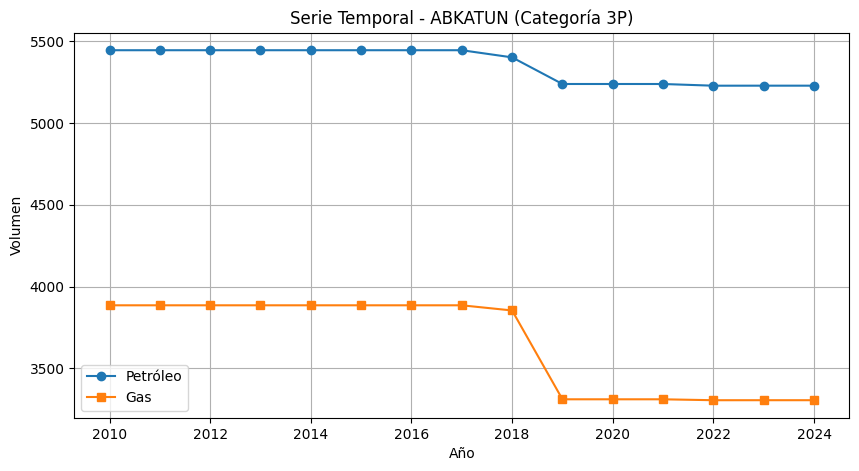

In [39]:
#Modelo para Reservas 3P
df_3p = df_grouped[df_grouped['CATEGORIA'] == '3P']
campo_ejemplo = df_3p['CAMPO_SIH'].unique()[0]  # tomar el primer campo como ejemplo
df_campo = df_3p[df_3p['CAMPO_SIH'] == campo_ejemplo]
#Serie temporal de un campo para entender comportamiento
plt.figure(figsize=(10, 5))
plt.plot(df_campo['AÑO'], df_campo['VOLUMEN_ORIGINAL_PETROLEO_MMB'], marker='o', label='Petróleo')
plt.plot(df_campo['AÑO'], df_campo['VOLUMEN_ORIGINAL_GAS_MMMPC'], marker='s', label='Gas')
plt.title(f'Serie Temporal - {campo_ejemplo} (Categoría 3P)')
plt.xlabel('Año')
plt.ylabel('Volumen')
plt.legend()
plt.grid(True)
plt.show()

In [76]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

# Función de predicción ARIMA
def forecast_arima(df_campo, columna, campo_nombre, steps=2):
    df_campo = df_campo.set_index('AÑO').sort_index()
    ts = df_campo[columna]

    try:
        model = ARIMA(ts, order=(1, 1, 1))
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=steps)
        last_year = ts.index.max()
        forecast_index = range(last_year + 1, last_year + steps + 1)
        forecast_series = pd.Series(forecast, index=forecast_index)
        return forecast_series
    except Exception as e:
        print(f"[Error con campo {campo_nombre}]: {e}")
        return None

# Cargar los datos agrupados
df_grouped = pd.read_csv("/content/Campos_ML_Model_Group.csv")

# Filtrar categoría 3P
df_3p = df_grouped[df_grouped['CATEGORIA'] == '3P']

# Generar predicciones
resultados = []

for campo in df_3p['CAMPO_SIH'].unique():
    df_temp = df_3p[df_3p['CAMPO_SIH'] == campo]

    pred_petroleo = forecast_arima(df_temp[['AÑO', 'VOLUMEN_ORIGINAL_PETROLEO_MMB']].copy(), 'VOLUMEN_ORIGINAL_PETROLEO_MMB', campo)
    pred_gas = forecast_arima(df_temp[['AÑO', 'VOLUMEN_ORIGINAL_GAS_MMMPC']].copy(), 'VOLUMEN_ORIGINAL_GAS_MMMPC', campo)

    if pred_petroleo is not None and pred_gas is not None:
        if len(pred_petroleo) >= 2 and len(pred_gas) >= 2:
            for i in range(2):
                resultados.append({
                    'CAMPO_SIH': campo,
                    'CATEGORIA': '3P',
                    'AÑO': df_temp['AÑO'].max() + i + 1,
                    'VOLUMEN_ORIGINAL_PETROLEO_MMB': pred_petroleo.iloc[i],
                    'VOLUMEN_ORIGINAL_GAS_MMMPC': pred_gas.iloc[i]
                })

# Guardar las predicciones en CSV
df_pred_final = pd.DataFrame(resultados)
df_pred_final.to_csv("/content/Predicciones_3P.csv", index=False)

from google.colab import files
files.download('Predicciones_3P.csv')




[Error con campo ACTUL]: too many indices for array: array is 0-dimensional, but 1 were indexed
[Error con campo ACTUL]: too many indices for array: array is 0-dimensional, but 1 were indexed
[Error con campo AKAL NW]: too many indices for array: array is 0-dimensional, but 1 were indexed
[Error con campo AKAL NW]: too many indices for array: array is 0-dimensional, but 1 were indexed
[Error con campo ATOYATL]: too many indices for array: array is 0-dimensional, but 1 were indexed
[Error con campo ATOYATL]: too many indices for array: array is 0-dimensional, but 1 were indexed
[Error con campo CAMATL]: too many indices for array: array is 0-dimensional, but 1 were indexed
[Error con campo CAMATL]: too many indices for array: array is 0-dimensional, but 1 were indexed
[Error con campo CHUCOX]: too many indices for array: array is 0-dimensional, but 1 were indexed
[Error con campo CHUCOX]: too many indices for array: array is 0-dimensional, but 1 were indexed
[Error con campo CHUCOX NW]:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

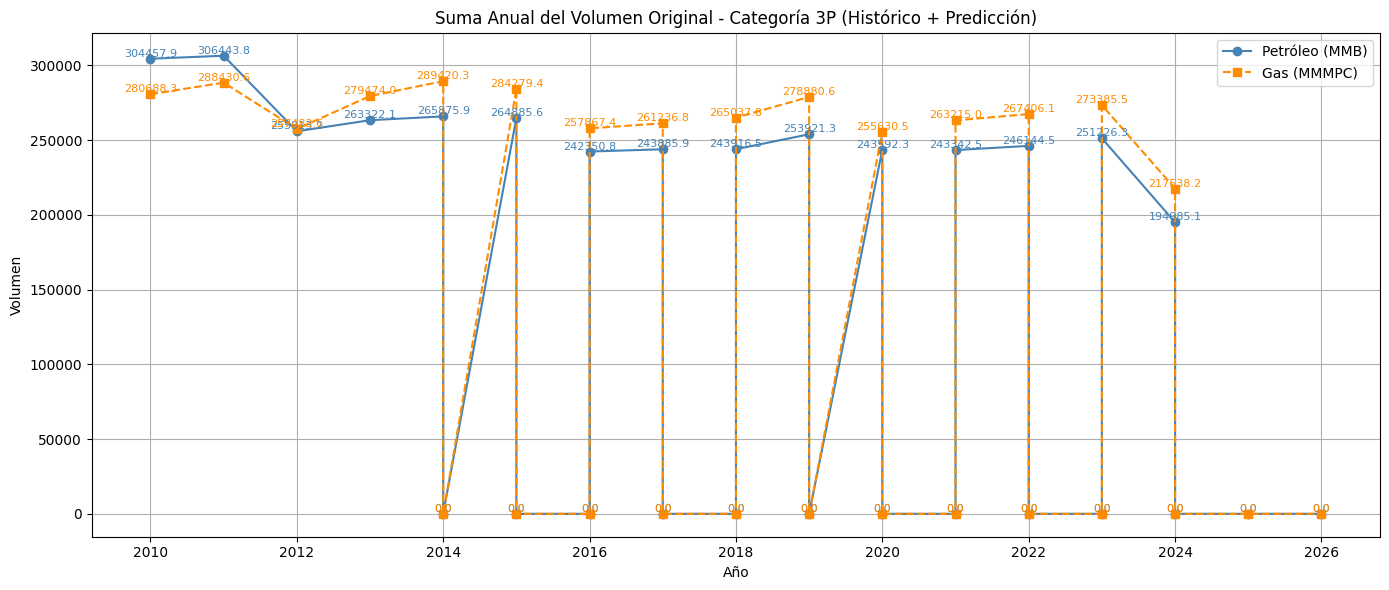

In [77]:
import matplotlib.pyplot as plt

# Cargar predicciones recién generadas
df_pred = pd.read_csv("/content/Predicciones_3P.csv")

# Volumen histórico de 3P
df_3p_historico = df_grouped[df_grouped['CATEGORIA'] == '3P']
volumen_historico = df_3p_historico.groupby('AÑO')[['VOLUMEN_ORIGINAL_PETROLEO_MMB', 'VOLUMEN_ORIGINAL_GAS_MMMPC']].sum().reset_index()

# Volumen predicho
volumen_predicho = df_pred.groupby('AÑO')[['VOLUMEN_ORIGINAL_PETROLEO_MMB', 'VOLUMEN_ORIGINAL_GAS_MMMPC']].sum().reset_index()

# Combinar ambos
volumen_total = pd.concat([volumen_historico, volumen_predicho], ignore_index=True).sort_values(by='AÑO')

# Graficar
plt.figure(figsize=(14, 6))
plt.plot(volumen_total['AÑO'], volumen_total['VOLUMEN_ORIGINAL_PETROLEO_MMB'],
         marker='o', linestyle='-', color='steelblue', label='Petróleo (MMB)')
plt.plot(volumen_total['AÑO'], volumen_total['VOLUMEN_ORIGINAL_GAS_MMMPC'],
         marker='s', linestyle='--', color='darkorange', label='Gas (MMMPC)')

for x, y in zip(volumen_total['AÑO'], volumen_total['VOLUMEN_ORIGINAL_PETROLEO_MMB']):
    plt.text(x, y, f'{y:.1f}', ha='center', va='bottom', fontsize=8, color='steelblue')
for x, y in zip(volumen_total['AÑO'], volumen_total['VOLUMEN_ORIGINAL_GAS_MMMPC']):
    plt.text(x, y, f'{y:.1f}', ha='center', va='bottom', fontsize=8, color='darkorange')

plt.title('Suma Anual del Volumen Original - Categoría 3P (Histórico + Predicción)')
plt.xlabel('Año')
plt.ylabel('Volumen')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [85]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

# Cargar los datos
df = pd.read_csv("/content/Campos_ML_Model_Group.csv")
df_3p = df[df['CATEGORIA'] == '3P']

# Filtrar campos con al menos 4 años de datos distintos de cero por variable
def campo_valido(df_campo, columna):
    serie = df_campo[columna]
    return serie[serie > 0].nunique() >= 4

campos_validos = []
for campo in df_3p['CAMPO_SIH'].unique():
    df_temp = df_3p[df_3p['CAMPO_SIH'] == campo]
    if campo_valido(df_temp, 'VOLUMEN_ORIGINAL_PETROLEO_MMB') and campo_valido(df_temp, 'VOLUMEN_ORIGINAL_GAS_MMMPC'):
        campos_validos.append(campo)

# Función para forecasting
def forecast_arima(df_campo, columna, campo_nombre, steps=2):
    df_campo = df_campo.set_index('AÑO').sort_index()
    ts = df_campo[columna]
    try:
        model = ARIMA(ts, order=(1,1,1))
        model_fit = model.fit(method_kwargs={"maxiter": 50})
        forecast = model_fit.forecast(steps=steps)
        forecast = forecast.apply(lambda x: max(0, x))  # Evita valores negativos
        last_year = ts.index.max()
        forecast_index = range(last_year + 1, last_year + steps + 1)
        forecast_series = pd.Series(forecast.values, index=forecast_index)
        return forecast_series
    except Exception as e:
        print(f"[Error con campo {campo_nombre}]: {e}")
        return None

# Aplicar modelo a los campos válidos
resultados = []

for campo in campos_validos:
    df_temp = df_3p[df_3p['CAMPO_SIH'] == campo]

    pred_petroleo = forecast_arima(df_temp[['AÑO', 'VOLUMEN_ORIGINAL_PETROLEO_MMB']].copy(), 'VOLUMEN_ORIGINAL_PETROLEO_MMB', campo)
    pred_gas = forecast_arima(df_temp[['AÑO', 'VOLUMEN_ORIGINAL_GAS_MMMPC']].copy(), 'VOLUMEN_ORIGINAL_GAS_MMMPC', campo)

    if pred_petroleo is not None and pred_gas is not None:
        for año in pred_petroleo.index:
            resultados.append({
                'CAMPO_SIH': campo,
                'CATEGORIA': '3P',
                'AÑO': año,
                'VOLUMEN_ORIGINAL_PETROLEO_MMB': pred_petroleo[año],
                'VOLUMEN_ORIGINAL_GAS_MMMPC': pred_gas[año]
            })

# Crear DataFrame de resultados y guardar
df_predicciones_3p = pd.DataFrame(resultados)
df_predicciones_3p.to_csv("/content/Predicciones_3P_ARIMA.csv", index=False)

# Mostrar una muestra y link de descarga
from google.colab import files
files.download("/content/Predicciones_3P_ARIMA.csv")
df_predicciones_3p.head()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,CAMPO_SIH,CATEGORIA,AÑO,VOLUMEN_ORIGINAL_PETROLEO_MMB,VOLUMEN_ORIGINAL_GAS_MMMPC
0,ABKATUN,3P,2025,5228.659565,3304.574831
1,ABKATUN,3P,2026,5228.671505,3304.574875
2,ACUATEMPA,3P,2025,101.729822,79.187974
3,ACUATEMPA,3P,2026,101.729822,79.187974
4,AGAVE,3P,2025,254.549767,2299.125007


from matplotlib import pyplot as plt
_df_6['AÑO'].plot(kind='hist', bins=20, title='AÑO')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['VOLUMEN_ORIGINAL_PETROLEO_MMB'].plot(kind='hist', bins=20, title='VOLUMEN_ORIGINAL_PETROLEO_MMB')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['VOLUMEN_ORIGINAL_GAS_MMMPC'].plot(kind='hist', bins=20, title='VOLUMEN_ORIGINAL_GAS_MMMPC')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_9.groupby('CAMPO_SIH').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='AÑO', y='VOLUMEN_ORIGINAL_PETROLEO_MMB', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='VOLUMEN_ORIGINAL_PETROLEO_MMB', y='VOLUMEN_ORIGINAL_GAS_MMMPC', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12['AÑO'].plot(kind='line', figsize=(8, 4), title='AÑO')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['VOLUMEN_ORIGINAL_PETROLEO_MMB'].plot(kind='line', figsize=(8, 4), title='VOLUMEN_ORIGINAL_PETROLEO_MMB')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['VOLUMEN_ORIGINAL_GAS_MMMPC'].plot(kind='line', figsize=(8, 4), title='VOLUMEN_ORIGINAL_GAS_MMMPC')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['CAMPO_SIH'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='AÑO', y='CAMPO_SIH', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['CAMPO_SIH'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='VOLUMEN_ORIGINAL_PETROLEO_MMB', y='CAMPO_SIH', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['CAMPO_SIH'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='VOLUMEN_ORIGINAL_GAS_MMMPC', y='CAMPO_SIH', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

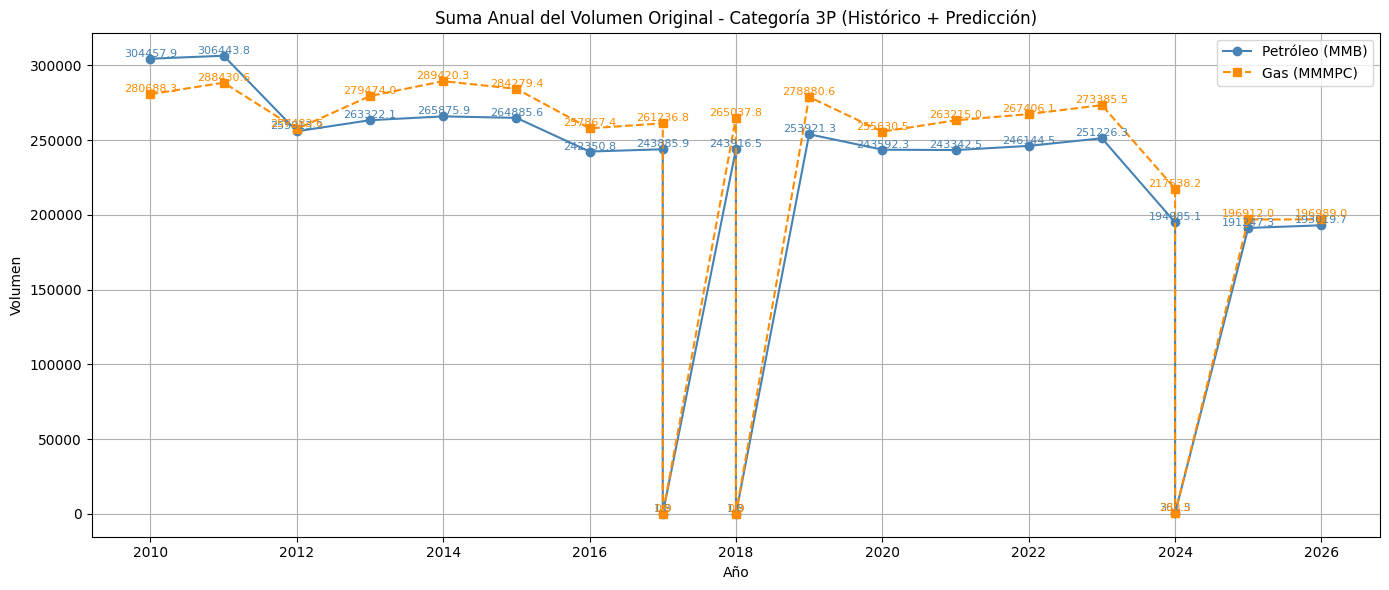

In [94]:
import matplotlib.pyplot as plt

# Cargar predicciones recién generadas
df_pred = pd.read_csv("/content/Predicciones_3P_ARIMA.csv")

# Volumen histórico de 3P
df_3p_historico = df_grouped[df_grouped['CATEGORIA'] == '3P']
volumen_historico = df_3p_historico.groupby('AÑO')[['VOLUMEN_ORIGINAL_PETROLEO_MMB', 'VOLUMEN_ORIGINAL_GAS_MMMPC']].sum().reset_index()

# Volumen predicho
volumen_predicho = df_pred.groupby('AÑO')[['VOLUMEN_ORIGINAL_PETROLEO_MMB', 'VOLUMEN_ORIGINAL_GAS_MMMPC']].sum().reset_index()

# Combinar ambos
volumen_total = pd.concat([volumen_historico, volumen_predicho], ignore_index=True).sort_values(by='AÑO')

# Graficar
plt.figure(figsize=(14, 6))
plt.plot(volumen_total['AÑO'], volumen_total['VOLUMEN_ORIGINAL_PETROLEO_MMB'],
         marker='o', linestyle='-', color='steelblue', label='Petróleo (MMB)')
plt.plot(volumen_total['AÑO'], volumen_total['VOLUMEN_ORIGINAL_GAS_MMMPC'],
         marker='s', linestyle='--', color='darkorange', label='Gas (MMMPC)')

for x, y in zip(volumen_total['AÑO'], volumen_total['VOLUMEN_ORIGINAL_PETROLEO_MMB']):
    plt.text(x, y, f'{y:.1f}', ha='center', va='bottom', fontsize=8, color='steelblue')
for x, y in zip(volumen_total['AÑO'], volumen_total['VOLUMEN_ORIGINAL_GAS_MMMPC']):
    plt.text(x, y, f'{y:.1f}', ha='center', va='bottom', fontsize=8, color='darkorange')

plt.title('Suma Anual del Volumen Original - Categoría 3P (Histórico + Predicción)')
plt.xlabel('Año')
plt.ylabel('Volumen')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [97]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Recargar datos base
df = pd.read_csv("/content/Campos_ML_Model_Group.csv")
df_3p = df[df["CATEGORIA"] == "3P"]

# Lista para resultados
resultados_validados = []

# Loop para cada campo
for campo in df_3p["CAMPO_SIH"].unique():
    df_temp = df_3p[df_3p["CAMPO_SIH"] == campo]

    pred_petroleo = None
    pred_gas = None

    # Validación de cantidad de años no nulos
    if df_temp["VOLUMEN_ORIGINAL_PETROLEO_MMB"].replace(0, np.nan).dropna().nunique() >= 4:
        try:
            ts_petroleo = df_temp[["AÑO", "VOLUMEN_ORIGINAL_PETROLEO_MMB"]].set_index("AÑO").sort_index().squeeze()
            modelo_petroleo = ARIMA(ts_petroleo, order=(1, 1, 1))
            resultado_petroleo = modelo_petroleo.fit(method_kwargs={"maxiter": 50})
            pred_petroleo = resultado_petroleo.forecast(steps=2)
        except:
            pred_petroleo = None

    if df_temp["VOLUMEN_ORIGINAL_GAS_MMMPC"].replace(0, np.nan).dropna().nunique() >= 4:
        try:
            ts_gas = df_temp[["AÑO", "VOLUMEN_ORIGINAL_GAS_MMMPC"]].set_index("AÑO").sort_index().squeeze()
            modelo_gas = ARIMA(ts_gas, order=(1, 1, 1))
            resultado_gas = modelo_gas.fit(method_kwargs={"maxiter": 50})
            pred_gas = resultado_gas.forecast(steps=2)
        except:
            pred_gas = None

    if pred_petroleo is not None and pred_gas is not None:
        for i in range(2):
            resultados_validados.append({
                "CAMPO_SIH": campo,
                "CATEGORIA": "3P",
                "AÑO": df_temp["AÑO"].max() + i + 1,
                "VOLUMEN_ORIGINAL_PETROLEO_MMB": pred_petroleo.iloc[i],
                "VOLUMEN_ORIGINAL_GAS_MMMPC": pred_gas.iloc[i],
            })

# Convertimos a DataFrame
import pandas as pd
df_pred_filtro = pd.DataFrame(resultados_validados)
df_pred_filtro.to_csv("/content/Predicciones_3P_Validadas.csv", index=False)

from google.colab import files
files.download("/content/Predicciones_3P_Validadas.csv")

df_pred_filtro.head(10)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,CAMPO_SIH,CATEGORIA,AÑO,VOLUMEN_ORIGINAL_PETROLEO_MMB,VOLUMEN_ORIGINAL_GAS_MMMPC
0,ABKATUN,3P,2025,5228.659565,3304.574831
1,ABKATUN,3P,2026,5228.671505,3304.574875
2,ACUATEMPA,3P,2025,101.729822,79.187974
3,ACUATEMPA,3P,2026,101.729822,79.187974
4,AGAVE,3P,2025,254.549767,2299.125007
5,AGAVE,3P,2026,254.549767,2299.125007
6,AGUA FRIA,3P,2025,604.119142,554.119199
7,AGUA FRIA,3P,2026,1001.248626,771.236569
8,AGUA NACIDA,3P,2025,921.924548,524.230670
9,AGUA NACIDA,3P,2026,1066.565721,518.760630


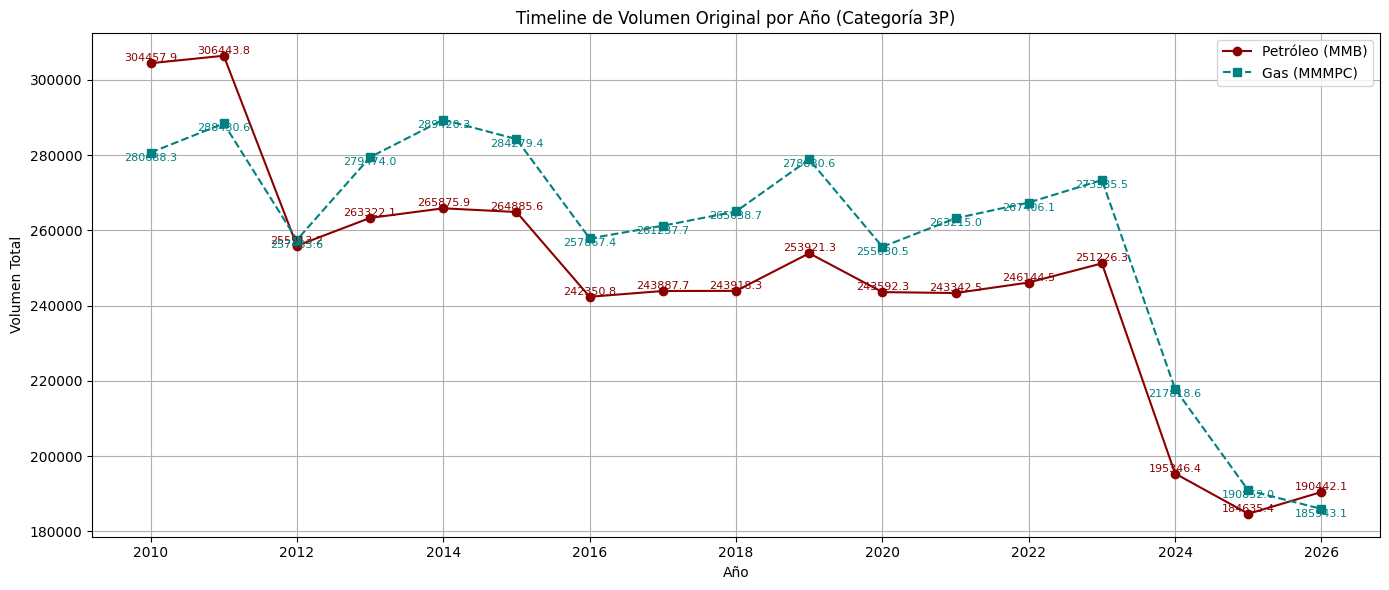

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Cargar archivos
df_original = pd.read_csv("/content/Campos_ML_Model_Group.csv")
df_predicciones = pd.read_csv("/content/Predicciones_3P_Validadas.csv")

# 2. Unir ambas tablas
df_combinado = pd.concat([df_original, df_predicciones], ignore_index=True)

# 3. Agrupar por año y sumar los volúmenes de la categoría 3P
df_timeline = df_combinado[df_combinado['CATEGORIA'] == '3P'].groupby('AÑO')[['VOLUMEN_ORIGINAL_PETROLEO_MMB', 'VOLUMEN_ORIGINAL_GAS_MMMPC']].sum().reset_index()

# 4. Graficar
plt.figure(figsize=(14, 6))
plt.plot(df_timeline['AÑO'], df_timeline['VOLUMEN_ORIGINAL_PETROLEO_MMB'], marker='o', linestyle='-', label='Petróleo (MMB)', color='darkred')
plt.plot(df_timeline['AÑO'], df_timeline['VOLUMEN_ORIGINAL_GAS_MMMPC'], marker='s', linestyle='--', label='Gas (MMMPC)', color='teal')

# 5. Añadir etiquetas con valores
for i in range(len(df_timeline)):
    plt.text(df_timeline['AÑO'][i], df_timeline['VOLUMEN_ORIGINAL_PETROLEO_MMB'][i], f"{df_timeline['VOLUMEN_ORIGINAL_PETROLEO_MMB'][i]:.1f}", ha='center', va='bottom', fontsize=8, color='darkred')
    plt.text(df_timeline['AÑO'][i], df_timeline['VOLUMEN_ORIGINAL_GAS_MMMPC'][i], f"{df_timeline['VOLUMEN_ORIGINAL_GAS_MMMPC'][i]:.1f}", ha='center', va='top', fontsize=8, color='teal')

plt.title('Timeline de Volumen Original por Año (Categoría 3P)')
plt.xlabel('Año')
plt.ylabel('Volumen Total')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
